In [103]:
# https://www.geeksforgeeks.org/network-centrality-measures-in-a-graph-using-networkx-python/
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import threading

def deg(c):
    deg_centrality = nx.degree_centrality(c)
    sorted_deg = dict(sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True)[:5])
    print('DEGREE CENTRALITY')
    print(sorted_deg)

def clos(c):
    clos_centrality = nx.closeness_centrality(c)
    sorted_clos = dict(sorted(clos_centrality.items(), key=lambda x:x[1], reverse=True)[:7])
    print('CLOSENESS CENTRALITY')
    print(sorted_clos)

def bet(c):
    bet_centrality = nx.betweenness_centrality(c, normalized = True, endpoints = False)
    sorted_bet = dict(sorted(bet_centrality.items(), key=lambda x:x[1], reverse=True)[:5])
    print('BETWEENESS CENTRALITY')
    print(sorted_bet)

def eig(c):
    eig_centrality = nx.eigenvector_centrality(c, max_iter=1000)
    sorted_eig = dict(sorted(eig_centrality.items(), key=lambda x:x[1], reverse=True)[:5])
    print('EIGENVECTOR CENTRALITY')
    print(sorted_eig)

In [82]:
# Import required Python package
!pip install snscrape
!pip install pyvis
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 https://deb.nodesource.com/node_20.x nodistro InRelease [12.1 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://deb.nodesource.com/node_20.x nodistro/main amd64 Packages [5,721 B]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64

In [105]:
# Crawl Data
# File to store the tweet harvest
filename = 'techbros.csv'

search_keyword = 'techbros since:2024-01-01'
limit = 100

# Token can be found in your cookie as auth_token when you've logged in to Twitter.
!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token "240ee7b2cd1eb84d848b21e3ecf47327e07ff712"

^C


In [97]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df.columns)

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [98]:
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 774.


In [99]:
from pyvis.network import Network
import pandas as pd
import networkx as nx
from tqdm import tqdm

# Select the relevant columns
_df = df[['username', 'in_reply_to_screen_name']]

# Drop rows with NaN values
_df = df.dropna(subset=['username', 'in_reply_to_screen_name'])

# Create lists of sources and destinations
sources = list(_df['username'])
destinations = list(_df['in_reply_to_screen_name'])

# Create a Network object
g_from_data = Network(height='600px', width='50%',
                      bgcolor='white', font_color="black",
                      heading="A Networkx Graph from DataFrame", directed=True,
                      notebook=True)

# Add nodes to the network
for i in tqdm(range(len(sources))):
    try:
        g_from_data.add_node(sources[i], label=sources[i], title=sources[i])
    except:
        pass

# Add edges to the network
for (i, j) in zip(sources, destinations):
    try:
        g_from_data.add_edge(i, j)
    except:
        pass

# Show buttons for physics simulation
g_from_data.show_buttons(['physics'])

# Save the network as an HTML file
g_from_data.show('A_Complete_Networkx_Graph_From_DataFrame.html')
# display(HTML('A_Complete_Networkx_Graph_From_DataFrame.html'))

100%|██████████| 337/337 [00:00<00:00, 97266.75it/s]

A_Complete_Networkx_Graph_From_DataFrame.html


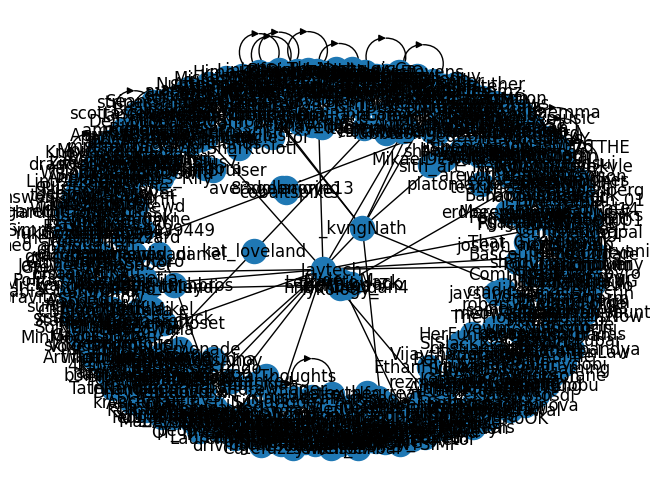

In [100]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Select the relevant columns
_df = df[['username', 'in_reply_to_screen_name']]

# Drop rows with NaN values
_df = df.dropna(subset=['username', 'in_reply_to_screen_name'])

# Rename columns to match the expected names in the original code
# _df = df.rename(columns={'username': 'displayname', 'in_reply_to_screen_name': 'retweetFrom'})

# Limit the DataFrame to a specific number of rows (if desired)
# df = df[:500]

# Build the graph
G = nx.from_pandas_edgelist(_df, 'username', 'in_reply_to_screen_name', create_using=nx.DiGraph())

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [104]:
# Select the relevant columns
_df = df[['username', 'in_reply_to_screen_name']]

# Drop rows with NaN values
_df = df.dropna(subset=['username', 'in_reply_to_screen_name'])

# Rename columns to match the expected names in the original code
# _df = df.rename(columns={'username': 'displayname', 'in_reply_to_screen_name': 'retweetFrom'})

# Build the graph
# c = nx.from_pandas_edgelist(_df, 'displayname', 'retweetFrom', create_using=nx.DiGraph())
c = nx.from_pandas_edgelist(_df, 'username', 'in_reply_to_screen_name', create_using=nx.DiGraph())

x4 = threading.Thread(target=clos, args=(c,))
x4.start()

CLOSENESS CENTRALITY
{'TechBros_7': 0.0064350064350064354, 'asuph': 0.005405405405405406, 'Letter_to_Jack': 0.005005005005005005, 'promoting_naija': 0.00498960498960499, 'abia_command': 0.00498960498960499, 'ishowspeedsui': 0.00498960498960499, 'MichaelEMann': 0.0036036036036036037}
